In [42]:
## which python is using
import sys
sys.executable

'/opt/miniconda-latest/envs/neuro/bin/python'

In [43]:
from matplotlib import pyplot as plt
import nibabel as nb
from os.path import join

In [46]:
fileName

'/home/hcp4715/Data/RepDopa/BIDS/BIDS/sub-001/ses-d1/anat/sub-001_ses-d1_T1w.nii'

In [48]:
subid = '001'
base_dir = '/home/hcp4715/Data/RepDopa/BIDS'
fileName = join(base_dir, 'BIDS', 'sub-' + subid, 'ses-d1', 'anat', 'sub-' + subid + '_ses-d1_T1w.nii.gz')
brainName = join(base_dir, 'BIDS',  'out.nii.gz')
#fileName = './sub-' + subid + '_ses-d1_T1w.nii'
#fileName2 = './out.nii.gz'

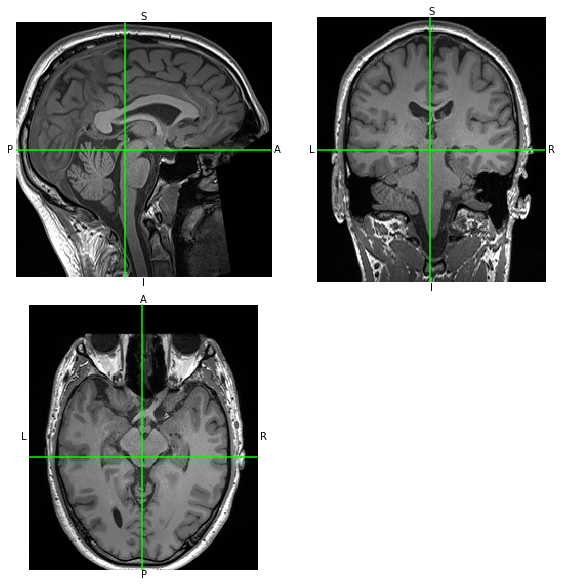

In [49]:
img = nb.load(fileName)
img.orthoview()
plt.show()

In [5]:
img.shape

(224, 256, 256)

In [6]:
from nipype.interfaces.fsl import BET
mybet = BET()
mybet.inputs.in_file = fileName
mybet.inputs.out_file = 'out.nii'
result = mybet.run()

In [39]:
qs = Quickshear(in_file = fileName, mask_file= brainName)

qs.cmdline

'quickshear /home/hcp4715/Data/RepDopa/BIDS/sub-001_ses-d1_T1w.nii /home/hcp4715/Data/RepDopa/BIDS/out.nii.gz sub-001_ses-d1_T1w_defaced.nii'

In [40]:
qs.run()

OSError: No command "quickshear" found on host NIC-Duo. Please check that the corresponding package is installed.

In [24]:
fileName

'/home/hcp4715/Data/RepDopa/BIDS/sub-001_ses-d1_T1w.nii'

In [29]:
from nipype.interfaces.quickshear import Quickshear

In [27]:
from nipype.pipeline import engine as pe
from nipype.interfaces import utility as niu
from nipype.interfaces.fsl import BET
from nipype.interfaces.quickshear import Quickshear

deface_wf = pe.Workflow('deface_wf',
                       base_dir = './')

inputnode = pe.Node(niu.IdentityInterface(['in_file']),

                    name='inputnode')


inputnode.inputs.in_file = fileName

outputnode = pe.Node(niu.IdentityInterface(['out_file']),

                     name='outputnode')

bet = pe.Node(BET(mask=True), name='bet')
bet.inputs.in_file = fileName
#bet.inputs.out_file = './sub-' + subid + '_ses-d1_T1w.nii'

quickshear = pe.Node(Quickshear(), name='quickshear')
quickshear.inputs.in_file = fileName

deface_wf.connect([

   # (inputnode, bet, [('in_file', 'in_file')]),

  #  (inputnode, quickshear, [('in_file', 'in_file')]),

    (bet, quickshear, [('mask_file', 'mask_file')]),

    (quickshear, outputnode, [('out_file', 'out_file')]),

    ])



In [28]:
res = deface_wf.run()

200427-17:30:36,490 nipype.workflow INFO:
	 Workflow deface_wf settings: ['check', 'execution', 'logging', 'monitoring']
200427-17:30:36,494 nipype.workflow INFO:
	 Running serially.
200427-17:30:36,495 nipype.workflow INFO:
	 [Node] Setting-up "deface_wf.bet" in "/home/hcp4715/Data/RepDopa/BIDS/deface_wf/bet".
200427-17:30:36,500 nipype.workflow INFO:
	 [Node] Running "bet" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /home/hcp4715/Data/RepDopa/BIDS/sub-001_ses-d1_T1w.nii /home/hcp4715/Data/RepDopa/BIDS/deface_wf/bet/sub-001_ses-d1_T1w_brain.nii.gz -m
200427-17:30:43,509 nipype.workflow INFO:
	 [Node] Finished "deface_wf.bet".
200427-17:30:43,510 nipype.workflow INFO:
	 [Node] Setting-up "deface_wf.quickshear" in "/home/hcp4715/Data/RepDopa/BIDS/deface_wf/quickshear".
200427-17:30:43,513 nipype.workflow INFO:
	 [Node] Running "quickshear" ("nipype.interfaces.quickshear.Quickshear"), a CommandLine Interface with command:
quickshear /home/hcp4715/D

RuntimeError: Workflow did not execute cleanly. Check log for details

In [21]:
!nipypecli crash crash-20200427-165909-neuro-bet-5abdb4c8-61d0-48e2-8999-0db042f9b24d.pklz



File: /home/hcp4715/Data/RepDopa/BIDS/crash-20200427-165909-neuro-bet-5abdb4c8-61d0-48e2-8999-0db042f9b24d.pklz
Node: deface_wf.bet
Working directory: /tmp/tmpb7y0bntq/deface_wf/bet


Node inputs:

args = <undefined>
center = <undefined>
environ = {'FSLOUTPUTTYPE': 'NIFTI_GZ'}
frac = <undefined>
functional = <undefined>
in_file = BIDS/sub-001/ses-d1/anat/sub-001_ses-d1_T1w.nii
mask = True
mesh = <undefined>
no_output = <undefined>
out_file = <undefined>
outline = <undefined>
output_type = NIFTI_GZ
padding = <undefined>
radius = <undefined>
reduce_bias = <undefined>
remove_eyes = <undefined>
robust = <undefined>
skull = <undefined>
surfaces = <undefined>
t2_guided = <undefined>
threshold = <undefined>
vertical_gradient = <undefined>



Traceback: 
Traceback (most recent call last):
  File "/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nipype/pipeline/plugins/linear.py", line 48, in run
    node.run(updatehash=updatehash)
  File "/opt/miniconda-latest/envs/neuro/lib/pyth